# Day-21 Assignment :-      (With Inference below)

## Logistic Regression of loan dataset with inference :-

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_excel("dataset-day-21/Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [3]:
dataset.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [4]:
dataset.isna().sum().sum()

0

In [5]:
dataset = dataset.drop(dataset.iloc[:,:1], axis = 1)
dataset = dataset.drop(dataset.iloc[:,3:4], axis =1)

In [6]:
dataset.head(2)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0


In [7]:
Y = dataset['Personal Loan']
X = dataset[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage','Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [8]:
import statsmodels.api as sm

In [9]:
X1 = sm.add_constant(X)

In [10]:
logistic = sm.Logit(Y,X1)

In [11]:
result = logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        09:28:05   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

## Inference :-

#### > Income,Family,CCAvg,Education,Securities Account,CD Account, Online ,CreditCard  's p-values are less than 0.05.
#### Hence these are Significant variables.                                                                                                                
#### In these Income,Family,Education,CD Account, Online ,CreditCard 's p-values are 0.00.
#### > Hence these are Most Significant variables.

## -----------------------------------------------------------------------------------------------------------------------

## Logistic Regression of Attrition dataset :-

In [12]:
dataset2 = pd.read_csv("dataset-day-21/general_data.csv")

In [13]:
dataset2.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4


In [14]:
dataset2 = dataset2.drop(dataset2.iloc[:,7:9], axis = 1)
dataset2 = dataset2.drop(dataset2.iloc[:,13:14], axis =1)
dataset2 = dataset2.drop(dataset2.iloc[:,14:15], axis =1)
dataset2.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4


In [15]:
dataset2 = dataset2.dropna()
dataset2 = dataset2.drop_duplicates()

In [16]:
dataset2.isna().sum().sum()

0

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelBinarizer()

In [18]:
dataset2['Attrition'] = label_encoder.fit_transform(dataset2['Attrition'])

In [19]:
dataset2.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4


In [20]:
Y2 = dataset2.Attrition
X2 = dataset2[['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [21]:
X21 = sm.add_constant(X2)

In [22]:
logistic2 = sm.Logit(Y2,X21)

In [23]:
result = logistic2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.406630
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1456
Method:                           MLE   Df Model:                           13
Date:                Tue, 11 Aug 2020   Pseudo R-squ.:                 0.07939
Time:                        09:28:07   Log-Likelihood:                -597.75
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 4.167e-16
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6271      0.591      1.061      0.288      -0.531       1.785
Age                        -0.0356      0.012     -3.042      0.002      -0.059      -0.013
DistanceFromHome           -0.0028      0.009     -0.311      0.756      -0.021       0.015
Education                  -0.0538      0.072     -0.747      0.455      -0.195       0.087
JobLevel                   -0.0331      0.067     -0.491      0.623      -0.165       0.099
MonthlyIncome           -2.246e-06   1.63e-06     -1.381      0.167   -5.43e-06    9.41e-07
NumCompaniesWorked          0.1099      0.031      3.525      0.000       0.049       0.171
PercentSalaryHike           0.0134      0.020      0.674      0.500      -0.026       0.053
StockOptionLevel           -0.0490      0.087     -0.560      0.576      -0.220       0.122
TotalWorkingYears          -0.0562      0.020     -2.749      0.006      -0.096      -0.016
TrainingTimesLastYear      -0.1330      0.060     -2.220      0.026      -0.250      -0.016
YearsAtCompany              0.0036      0.032      0.113      0.910      -0.058       0.065
YearsSinceLastPromotion     0.1231      0.035      3.524      0.000       0.055       0.192
YearsWithCurrManager       -0.1282      0.037     -3.424      0.001      -0.202      -0.055
===========================================================================================
"""

## Inference :-

#### > Age, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsSinceLastPromotion, YearsWithCurrManager 's p-values are less than .
#### Hence these are Significant variables.
#### > NumCompaniesWorked, YearsSinceLastPromotion 's p-values are 0.00
#### Hence these are Most Significant variables. These variables are the main reason for attrition 

## ---------------------------------------------------------------------------------------------------

# Linear Regression :-

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
import numpy as np

In [25]:
dataset3 = pd.read_excel("dataset-day-21/Linear Regression.xlsx",sheet_name=0)

In [26]:
dataset3.head(2)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0


In [27]:
dataset3 = dataset3.dropna()
dataset3= dataset3.drop_duplicates()

### Model-1 :- price vs sqft_living

In [28]:
mod1data = dataset3.drop(dataset3.iloc[:,2:], axis = 1)
mod1data.head(2)

,price,sqft_living
0,221900,1180
1,538000,2570


In [29]:
mod1data.corr()

,price,sqft_living
price,1.000000,0.701635
sqft_living,0.701635,1.000000


#### > Price and Sqft_living are positively co-related

In [30]:
x = mod1data.iloc[:,:1]
y = mod1data.iloc[:,1:]

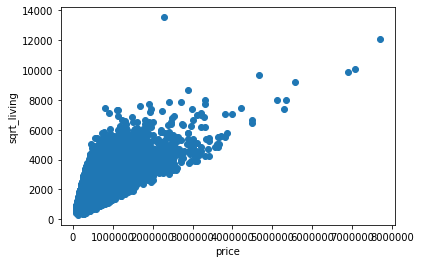

In [31]:
plt.scatter(x,y)
plt.xlabel('price')
plt.ylabel('sqrt_living')
plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [33]:
lin_reg.fit(x_train,y_train)
lin_reg.coef_
lin_reg.intercept_

array([1128.49857288])

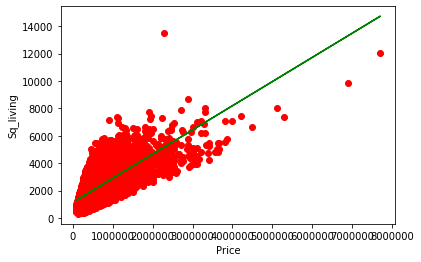

In [34]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('Sq_living')
plt.show()

In [35]:
ypred=lin_reg.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,ypred)

print('The R2 value is...',r_square)

The R2 value is... 0.5046274956369325


## Inference :-

#### This model's prediction is 50.46% accurate 

In [37]:
unseen_pred=lin_reg.predict(np.array([[538000]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[2078.96170863]]


#### The expected answer was 2570 but it is 2078.                              
#### The error is 2570 - 2078 = 492

## ----------------------------------------------------------------------------------------------------

## Model-2 :- price vs bedroom

In [38]:
data1 = dataset3.drop(dataset3.iloc[:,1:2], axis = 1)
mod2data = data1.drop(data1.iloc[:,2:], axis = 1)
mod2data.head(2)

,price,bedrooms
0,221900,3
1,538000,3


In [39]:
mod2data.corr()

,price,bedrooms
price,1.000000,0.307048
bedrooms,0.307048,1.000000


#### > Price and bedrooms are positively Correlated

In [40]:
x2 = mod2data.iloc[:,:1]
y2 = mod2data.iloc[:,1:]

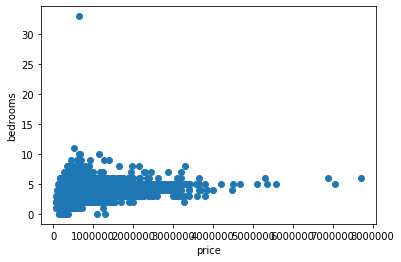

In [41]:
plt.scatter(x2,y2)
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

In [42]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size = 0.2,random_state = 2)
lin_reg.fit(x2_train,y2_train)
lin_reg.coef_
lin_reg.intercept_

array([2.94287645])

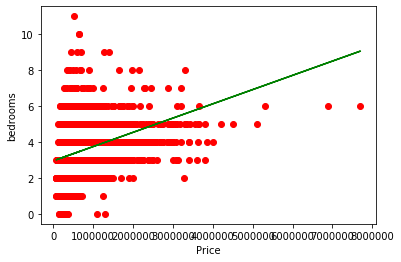

In [43]:
plt.scatter(x2_train, y2_train, color = 'red')
plt.plot(x2_train, lin_reg.predict(x2_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('bedrooms')
plt.show()

In [44]:
ypred=lin_reg.predict(x2_test)
r_square=r2_score(y2_test,ypred)

print('The R2 value is...',r_square)

The R2 value is... 0.07347774735492374


## Inference :-

#### From R2 value we can say that this model is  73.47% accurate .


In [45]:
unseen_pred=lin_reg.predict(np.array([[538000]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[3.37094176]]


#### > The expected answer was 3 but it was 3.37                                 
#### > Hence the error is 3.37 - 3 = 0.37

## -----------------------------------------------------------------------------------------------------------------

## Model-3 :- price vs bathrooms

In [46]:
data2 = dataset3.drop(dataset3.iloc[:,1:3], axis = 1)
mod3data = data2.drop(data2.iloc[:,2:], axis = 1)
mod3data.head(2)

,price,bathrooms
0,221900,1.00
1,538000,2.25


In [47]:
mod2data.corr()

,price,bedrooms
price,1.000000,0.307048
bedrooms,0.307048,1.000000


#### > price and bathrooms are positively Coorelated

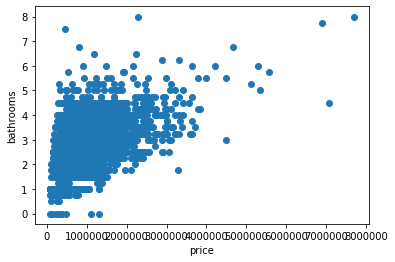

In [48]:
x3 = mod3data.iloc[:,:1]
y3 = mod3data.iloc[:,1:]
plt.scatter(x3,y3)
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()

In [49]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size = 0.2,random_state = 2)
lin_reg.fit(x3_train,y3_train)
lin_reg.coef_
lin_reg.intercept_

array([1.51265949])

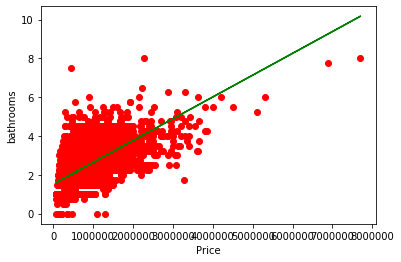

In [50]:
plt.scatter(x3_train, y3_train, color = 'red')
plt.plot(x3_train, lin_reg.predict(x3_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('bathrooms')
plt.show()

In [51]:
ypred=lin_reg.predict(x3_test)
r_square=r2_score(y3_test,ypred)

print('The R2 value is...',r_square)

The R2 value is... 0.2457795669827303


### Inference :-

#### > This model is 24.57% accurate

In [52]:
unseen_pred=lin_reg.predict(np.array([[221900]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[1.76224084]]


#### > The expected answer was 1.0 but it is 1.76                          
#### > Error : 1.76-1.0 = 0.76

## ----------------------------------------------------------------------------------------------------------------

## Model-4 :- price vs floors

In [53]:
mod4data = dataset3.drop(dataset3.iloc[:,1:4], axis = 1)
mod4data.head(2)

,price,floors
0,221900,1.0
1,538000,2.0


In [54]:
mod4data.corr()

,price,floors
price,1.000000,0.256003
floors,0.256003,1.000000


### > Price and floors are positively coreleted

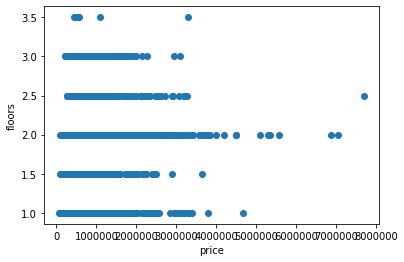

In [55]:
x4 = mod4data.iloc[:,:1]
y4 = mod4data.iloc[:,1:]
plt.scatter(x4,y4)
plt.xlabel('price')
plt.ylabel('floors')
plt.show()

In [56]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size = 0.2,random_state = 2)
lin_reg.fit(x4_train,y4_train)
lin_reg.coef_
lin_reg.intercept_

array([1.28308583])

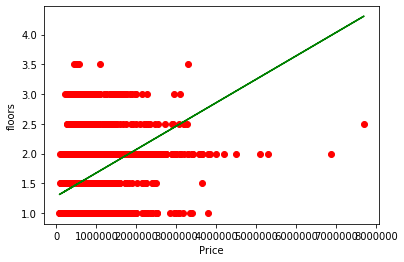

In [57]:
plt.scatter(x4_train, y4_train, color = 'red')
plt.plot(x4_train, lin_reg.predict(x4_train), color = 'green')
plt.xlabel('Price')
plt.ylabel('floors')
plt.show()

In [58]:
ypred=lin_reg.predict(x4_test)
r_square=r2_score(y4_test,ypred)

print('The R2 value is...',r_square)

The R2 value is... 0.044560797815734854


## Inference :-

#### > This model is 44.56 % accurate

In [59]:
unseen_pred=lin_reg.predict(np.array([[538000]]))
print('The unseen for the given x is....',unseen_pred)

The unseen for the given x is.... [[1.49447198]]


#### > The expected answer was 2 but it is 1.49                              
#### > Error: 2 - 1.49 = 0.51

# ---------------------------------------------------------------------------------------------------------------